In [28]:
import pandas as pd
import pyrsm as rsm
from sklearn.model_selection import ShuffleSplit


In [29]:
inv = pd.read_csv("Invitation.csv")
inv.head()

,Invitation_ID,Activity,Day,Time,Distance,Cost,Accept
0,1,Tennis,Weekday,Morning,0.5,0.0,Yes
1,2,Pickleball,Weekday,Morning,0.5,0.0,No
2,3,Shopping,Weekday,Morning,1.0,0.0,No
3,4,Grocering,Weekday,Morning,1.0,30.0,No
4,5,Shopping,Weekend,Afternoon,1.0,0.0,Yes


In [30]:
X = inv.drop(columns=["Accept"])
y = inv["Accept"]

# Define ShuffleSplit (80% training, 20% testing, 1 split)
ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Apply ShuffleSplit
for train_idx, test_idx in ss.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Display shuffled train and test sets
print("Training Set:")
train_df = pd.concat([X_train, y_train], axis=1)
print(train_df)

print("\nTesting Set:")
test_df = pd.concat([X_test, y_test], axis=1)
print(test_df)

Training Set:
    Invitation_ID    Activity      Day       Time  Distance  Cost Accept
55             56    Shopping  Weekend      Night       1.0   0.0     No
88             89    Shopping  Weekend    Morning       1.0   0.0     No
26             27   VideoGame  Weekday  Afternoon       0.2   0.0     No
42             43    StayHome  Weekday  Afternoon       0.0   0.0    Yes
69             70    StayHome  Weekend  Afternoon       0.0   0.0    Yes
..            ...         ...      ...        ...       ...   ...    ...
60             61  Pickleball  Weekday  Afternoon       0.5   0.0     No
71             72    Shopping  Weekend    Morning       2.0   0.0    Yes
14             15   Grocering  Weekend  Afternoon       1.0  30.0     No
92             93      Dinner  Weekend      Night       3.0  50.0     No
51             52      Tennis  Weekend    Morning       0.5   0.0    Yes

[80 rows x 7 columns]

Testing Set:
    Invitation_ID    Activity      Day       Time  Distance  Cost Accept


No plot will be created for Activity (type object)
No plot will be created for Day (type object)
No plot will be created for Time (type object)
No plot will be created for Accept (type object)


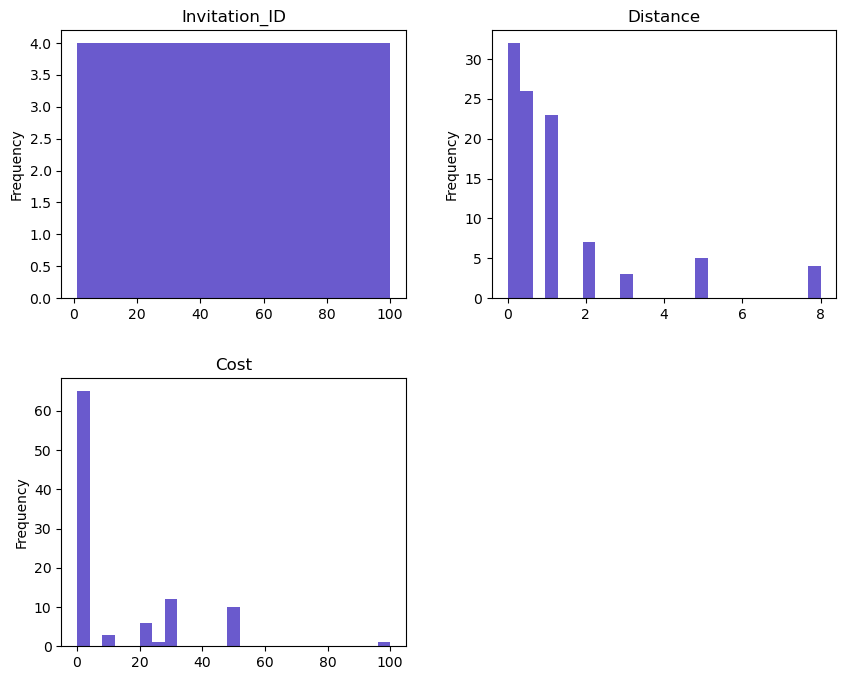

In [31]:
rsm.distr_plot(inv)

In [32]:
clf = rsm.model.logistic(
    data=train_df,
    rvar='Accept',
    lev='Yes',
    evar=[
        'Activity',
        'Day',
        'Time',
        'Distance',
        'Cost'
    ]
)

clf.summary(vif=True)

Logistic regression (GLM)
Data                 : Not provided
Response variable    : Accept
Level                : Yes
Explanatory variables: Activity, Day, Time, Distance, Cost
Null hyp.: There is no effect of x on Accept
Alt. hyp.: There is an effect of x on Accept

                                OR                      OR%  coefficient  std.error  z.value p.value    
Intercept             0.000000e+00                  -100.0%       -23.59  26713.652   -0.001   0.999    
Activity[Dinner]      1.044524e+10         1044523949731.0%        23.07  26713.652    0.001   0.999    
Activity[Grocering]   3.355636e+09          335563634089.2%        21.93  26713.652    0.001   0.999    
Activity[Pickleball]  1.130000e-01                   -88.7%        -2.18  35457.032   -0.000     1.0    
Activity[Shopping]    2.471745e+09          247174471447.7%        21.63  26713.652    0.001   0.999    
Activity[StayHome]    1.228443e+20  1.2284426667398636e+22%        46.26  34680.764    0.001   0.999 

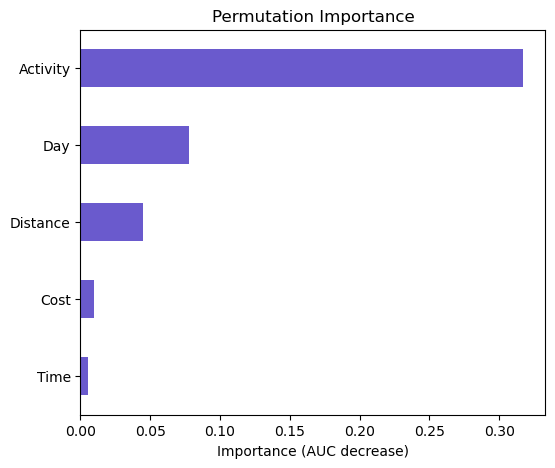

In [33]:
clf.plot('vimp')

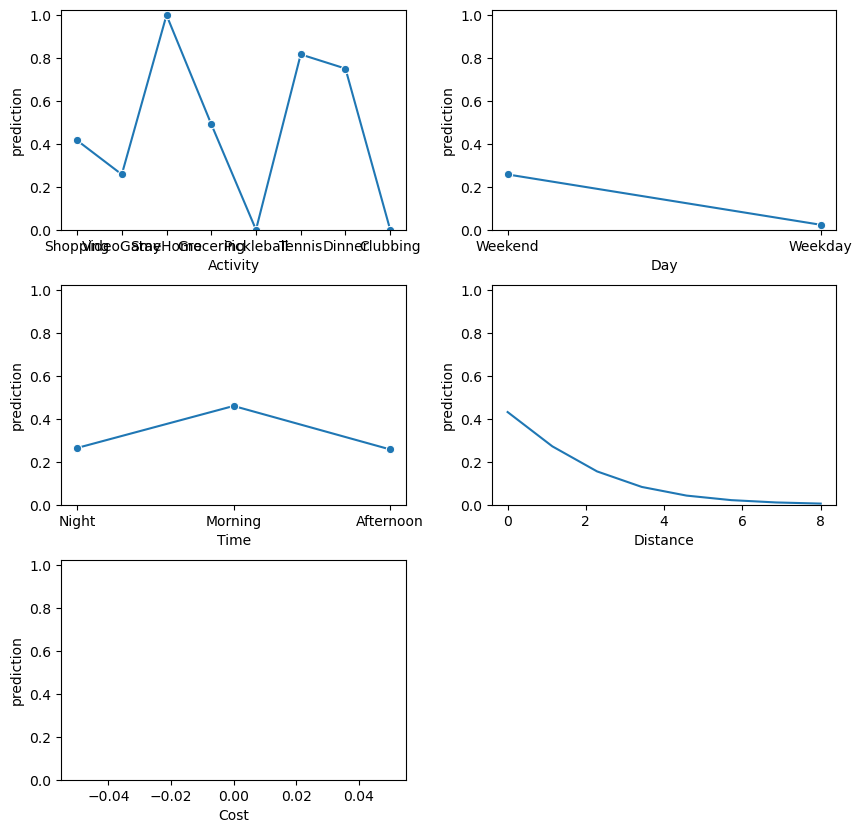

In [34]:
clf.plot('pred')

In [42]:
test_df['pred_logit'] = clf.predict(data=test_df)['prediction']
test_df.head()

,Invitation_ID,Activity,Day,Time,Distance,Cost,Accept,pred_logit
83,84,Grocering,Weekend,Morning,1.0,30.0,Yes,0.639820
53,54,VideoGame,Weekend,Night,0.2,0.0,Yes,0.479638
70,71,Shopping,Weekend,Morning,2.0,20.0,No,0.473343
45,46,Grocering,Weekend,Afternoon,3.0,0.0,No,0.303632
44,45,Grocering,Weekday,Morning,1.0,30.0,No,0.107710


In [47]:
cutoff = test_df.pred_logit.mean()/2
cutoff

0.2679652471796538

In [48]:
test_df['pred_class'] = test_df.pred_logit.map(lambda x: 'Yes' if x > cutoff else 'No')

def confusion_matrix(y_true, y_pred):
    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

confusion_matrix(test_df.Accept, test_df.pred_class)

Predicted,No,Yes,All
True,,,
No,4,4,8
Yes,1,11,12
All,5,15,20


In [49]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

accuracy(test_df.Accept, test_df.pred_class)

0.75

In [50]:
test_df

,Invitation_ID,Activity,Day,Time,Distance,Cost,Accept,pred_logit,pred_class
83,84,Grocering,Weekend,Morning,1.0,30.0,Yes,6.398203e-01,Yes
53,54,VideoGame,Weekend,Night,0.2,0.0,Yes,4.796379e-01,Yes
70,71,Shopping,Weekend,Morning,2.0,20.0,No,4.733434e-01,Yes
45,46,Grocering,Weekend,Afternoon,3.0,0.0,No,3.036325e-01,Yes
44,45,Grocering,Weekday,Morning,1.0,30.0,No,1.077097e-01,No
39,40,Pickleball,Weekend,Afternoon,0.5,0.0,No,6.946453e-11,No
22,23,Grocering,Weekend,Morning,1.0,30.0,Yes,6.398203e-01,Yes
80,81,Tennis,Weekend,Night,0.5,0.0,No,9.077139e-01,Yes
10,11,VideoGame,Weekend,Night,0.2,0.0,Yes,4.796379e-01,Yes
0,1,Tennis,Weekday,Morning,0.5,0.0,Yes,6.131512e-01,Yes
